### Plot peak frequencies from text file.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
# REad dataframe.
file_path = '../data_in/Mdau_TE384_ANALYSIS_RESULTS.txt'
file_path = '../data_in/Ppip_TE384_ANALYSIS_RESULTS.txt'
#file_path = '../data_in/Myotis-Plecotus-Eptesicus_TE384_ANALYSIS_RESULTS.txt'

peak_df = pd.read_csv(file_path, sep="\t")
peak_df.head()

,time_s,frequency_hz,amplitude_dbfs,signal_index
0,0.06763,65898.0,-40.5,25968
1,0.06775,61271.0,-36.5,26016
2,0.06788,60640.0,-30.2,26064
3,0.06800,55409.0,-37.1,26112
4,0.06813,55918.0,-30.6,26160


In [4]:
# Calculate and add columns.
peak_df['frequency_khz'] = peak_df.frequency_hz / 1000
#absmin = abs(min(peak_df.amplitude_dbfs))
#print(absmin)
#peak_df['plot_size'] = (peak_df.amplitude_dbfs + absmin) **1.2
#peak_df.head()

In [5]:
# Calculate time for compressed view, with no space between chirps. 
peak_df['time_compressed_s'] = [x*0.125/1000 for x in range(0, len(peak_df.index))]
peak_df.head()

,time_s,frequency_hz,amplitude_dbfs,signal_index,frequency_khz,time_compressed_s
0,0.06763,65898.0,-40.5,25968,65.898,0.000000
1,0.06775,61271.0,-36.5,26016,61.271,0.000125
2,0.06788,60640.0,-30.2,26064,60.640,0.000250
3,0.06800,55409.0,-37.1,26112,55.409,0.000375
4,0.06813,55918.0,-30.6,26160,55.918,0.000500


In [6]:
# Rename columns before plotting.
peak_df.rename(columns={'time_s': 'Time (s)', 
                        'frequency_khz': 'Frequency (kHz)', 
                        'amplitude_dbfs': 'Amplitude (dBFS)', 
                        'time_compressed_s': 'Compressed time (s)'}, inplace=True)

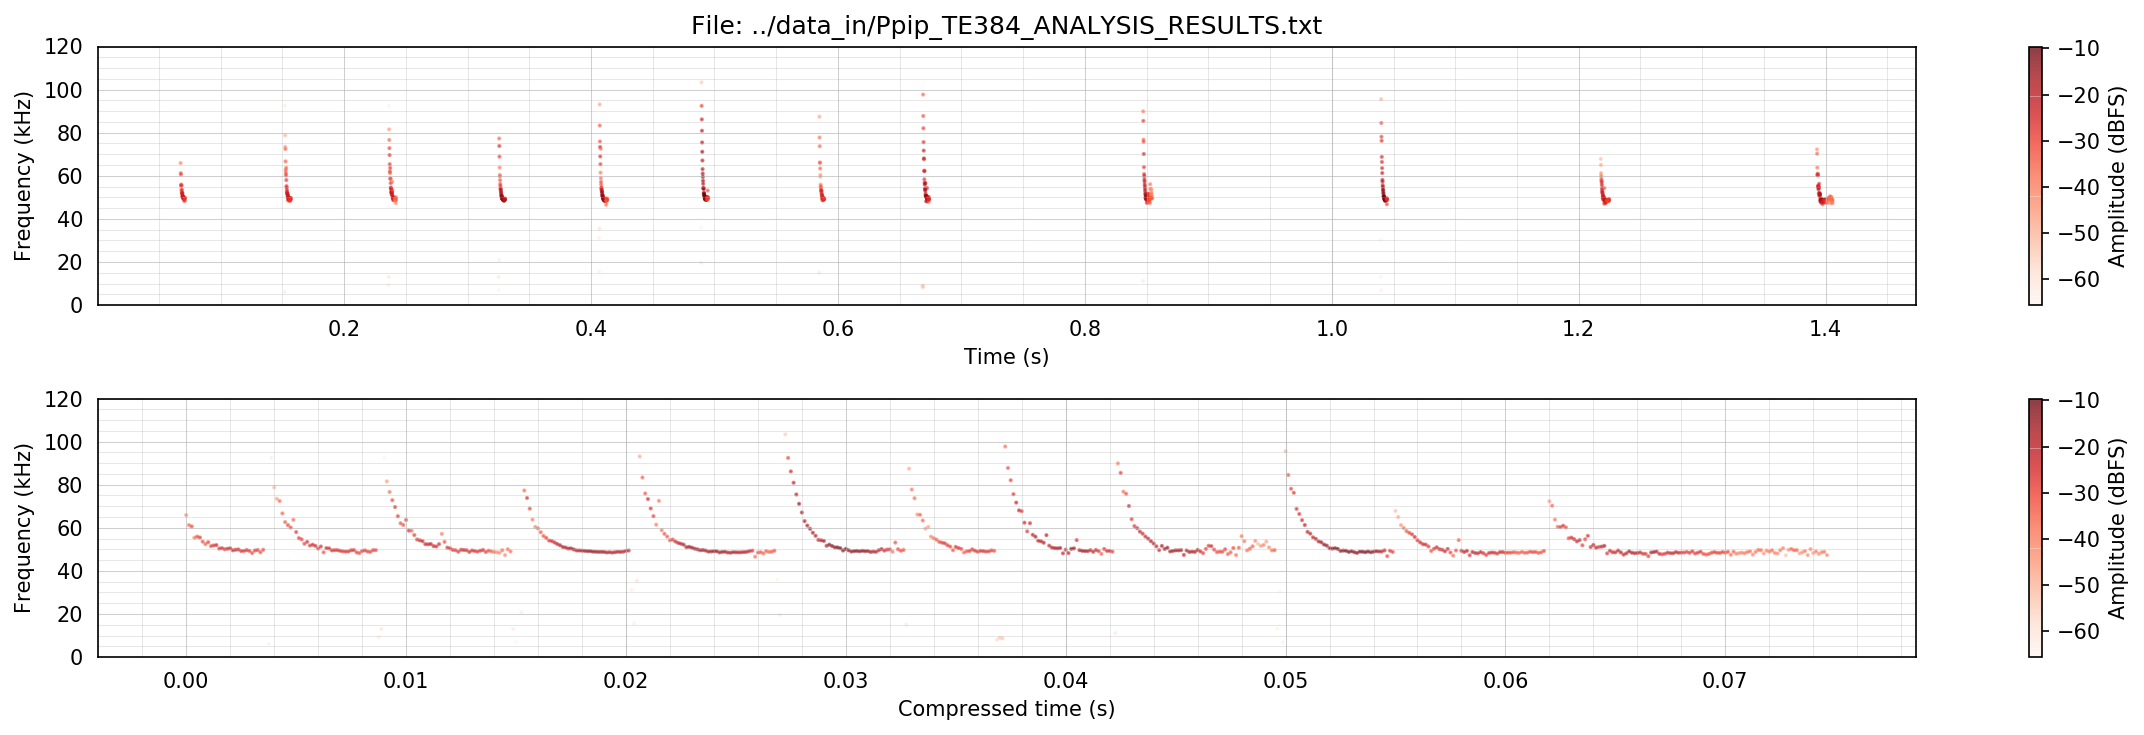

In [7]:
# Plot two diagrams, normal and compressed time.
fig, (ax1, ax2) = plt.subplots(2,1,
                       figsize=(16, 5), 
                       dpi=150, 
                       #facecolor='w', 
                       #edgecolor='k',
                              )
# ax1.
peak_df.plot(kind='scatter',
             x='Time (s)',
             y='Frequency (kHz)',
             s=1,
             c='Amplitude (dBFS)',
             cmap=plt.get_cmap('Reds'),  #'YlOrRd'
             alpha=0.5,
             ax=ax1)
ax1.set_title('File: ' + file_path)
ax1.set_ylim((0,120))
ax1.minorticks_on()
ax1.grid(which='major', linestyle='-', linewidth='0.5', alpha=0.6)
ax1.grid(which='minor', linestyle='-', linewidth='0.5', alpha=0.3)
ax1.tick_params(which='both', top='off', left='off', right='off', bottom='off') 
# ax2.
peak_df.plot(kind='scatter',
             x='Compressed time (s)',
             y='Frequency (kHz)',
             s=1,
             c='Amplitude (dBFS)',
             cmap=plt.get_cmap('Reds'),  #'YlOrRd'
             alpha=0.5,
             ax=ax2)
ax2.set_ylim((0,120))
ax2.minorticks_on()
ax2.grid(which='major', linestyle='-', linewidth='0.5', alpha=0.6)
ax2.grid(which='minor', linestyle='-', linewidth='0.5', alpha=0.3)
ax2.tick_params(which='both', top='off', left='off', right='off', bottom='off') 

plt.tight_layout()
fig.savefig('test.png')
plt.show()